### Integration of ordinary differential equations
#### Euler method and its stability

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Solve the differential equation
$$y' = \alpha y$$
By the Euler method for $x\in [0, 6]$, $y(0) = 1$, $\alpha=-1$. Try different step sizes $\Delta x = 0.1, 1, 2, 2.5$. The analytic solution converges towards zero. Does it hold for the numerical solution as well?

In [2]:
def euler(f, y0, x0, xmax, dx, args=()):
    # task 1
    ....
    return x, y

In [3]:
def f(x, y, alpha=-1):
    return alpha*y

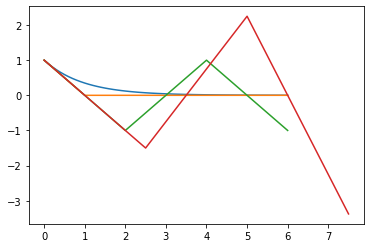

In [4]:
for dx in [0.1, 1, 2, 2.5]:
    x, y = euler(f, y0=[1], x0=0, xmax=6, dx=dx)
    plt.plot(x, y)

### Bonus task:
The analytic solution converges towards zero if $\Re(\alpha) < 0$. If we integrate with time step $\Delta x=1$, for which values of the complex parameter $\alpha$ does the Euler method converge? Solve the previous task for real and imaginary values of $\alpha$ in the range $\Re(\alpha)\in[-2.2, 2.2]$, $\Im(\alpha)\in[-2.2, 2.2]$ and draw the last integrated value in a 2D color map.

In [5]:
sampl_im = 80
sampl_re = 80

ylast = np.zeros((sampl_im, sampl_re), dtype=np.complex128)
alpha_im = np.linspace(-2.2, 2.2, sampl_im)
alpha_re = np.linspace(-2.2, 2.2, sampl_re)
for i_re in range(sampl_re):
    for i_im in range(sampl_im):
        alpha = alpha_re[i_re] + alpha_im[i_im]*1j
        x, y = euler(f, y0=[1+0j], x0=0, xmax=40, dx=1, args=(alpha,))
        ylast[i_im, i_re] = y[-1]

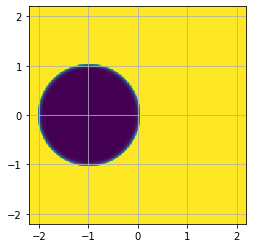

In [6]:
plt.imshow(np.abs(ylast[::-1, :]), vmin=0, vmax=10, extent=(-2.2, 2.2, -2.2, 2.2), aspect="equal")
plt.gca().set_yticks([-2, -1, 0, 1, 2])
plt.grid()

### Chemical kinetics
Consider the chemical reactions of ions
$$\rm NH^+ + H_2 \xrightarrow{r_1} NH_2^+ + H$$
$$\rm NH_2^+ + H_2 \xrightarrow{r_2} NH_3^+ + H$$
Ion number densities are described by equations (see the law of mass action, simplifying and treating $[\rm H_2]$ as a constant...).
$$
\frac{\rm d[NH^+]}{{\rm d}t} = -r_1[{\rm NH^+}]
$$
$$
\frac{\rm d[NH_2^+]}{{\rm d}t} = -r_2[{\rm NH_2^+}] + r_1[{\rm NH^+}]
$$
$$
\frac{\rm d[NH_3^+]}{{\rm d}t} = r_2[{\rm NH_2^+}]
$$
Assume that $r_1 = 200\,\rm s^{-1}$  and $r_2 = 100\,\rm s^{-1}$. Calculate the evolution of ion number densities for the initial value of $\rm [NH_2^+] = 10^3\,\rm cm^{-3}$.

Note: the right-hand side can also be written as
$$
\frac{\rm d}{{\rm d}t}
\left(\begin{matrix}{}
           {\rm [NH^+]}\\\
           {\rm [NH_2^+]}\\\
           {\rm [NH_3^+]}
    \end{matrix}\right) =
\left(\begin{matrix}{}
           -r_1 & 0    & 0\\\
            r_1 & -r_2 & 0\\\
              0 &  r_2 & 0
    \end{matrix}\right)\cdot
    \left(\begin{matrix}{}
           {\rm [NH^+]}\\\
           {\rm [NH_2^+]}\\\
           {\rm [NH_3^+]}
    \end{matrix}\right)
    $$

In [7]:
# implement the right hand side
# f(x:float, y:array[float], r:array/matrix[float]) -> array[float]
def f(x, y, r):
    # task 2

In [ ]:
r = [200, 100]
N0 = [1, 0, 0]
t, y = euler(f, N0, 0, 0.06, 0.001, args=(r,))
plt.plot(t, y);

#### Example of stiff system
Assume
$$
\frac{{\rm d} A_1}{{\rm d}t} = -r_1 A_1 + r_2 A_2
$$
$$
\frac{{\rm d} A_2}{{\rm d}t} = +r_1 A_1 - r_2 A_2 - r_3 A_2
$$
$$
\frac{{\rm d} B}{{\rm d}t} = +r_3 A_2
$$
or
$$
\frac{\rm d}{{\rm d}t}
\left(\begin{matrix}{}
           {\rm A_1}\\\
           {\rm A_2}\\\
           {\rm B}
    \end{matrix}\right) =
\left(\begin{matrix}{}
           -r_1 &  r_2 & 0\\\
            r_1 & -r_2-r_3 & 0\\\
              0 &  r_3 & 0
    \end{matrix}\right)\cdot
    \left(\begin{matrix}{}
           {\rm A_1}\\\
           {\rm A_2}\\\
           {\rm B}
    \end{matrix}\right)
    $$
where $r_1\approx r_2 \gg r_3$. Processes $r_1$ and $r_2$ can represent, e.g., fast relaxation of internal states of $A$. Take, for example $r_1 = r_2 = 20000; r_3 = 100$.

### Task 03 Solve with Euler and implicit Euler methods